In [73]:
Nn = 3
Ns = 30
PBC = 0 #0 or 1
source = 'DMRG' #'ED' or 'DMRG'
Λ = 10000
ω = 0
gs=['0.00','0.10','1.00','10.00','100.00']


In [74]:
import time

print("Importing libraries...",end='')
t0 = time.time()

import numpy as np
from scipy.sparse import csr_matrix, lil_matrix
from scipy.sparse.linalg import eigsh
from scipy.linalg import ishermitian
from numpy import sqrt,exp,pi,zeros,arange,copy, sin, pi,loadtxt,poly1d, ones,reshape,floor
import os.path

from numpy import linalg as LA
import matplotlib.pyplot as plt
import scipy

D = 1/Ns

print("DONE in %0.3f [ms]"%(1000*(time.time()-t0)))

Importing libraries...DONE in 0.154 [ms]


In [75]:
print("Loading energies...",end='')
t0 = time.time()

maxN = {}
EnergiesK = {}
EnergiesU = {}
EnergiesL = {}
EnergiesT = {}

line = []

#print('\ng','\t','N','\t','Kin Energy','\t','Short-Range Int Energy')
for g in gs:
    for N in range(2,100):
        if os.path.exists('./Energies/N%i_Ns%i_Nn%i_PBC%i_Lambda%.2f_omega%.2f_g%s_%s'%(N,Ns,Nn,PBC,Λ,ω,g,source)):
            maxN[g]=N
            data = loadtxt('./Energies/N%i_Ns%i_Nn%i_PBC%i_Lambda%.2f_omega%.2f_g%s_%s'%(N,Ns,Nn,PBC,Λ,ω,g,source),usecols=1)
            EnergiesK[N,g]= float(data[0])
            EnergiesU[N,g]= float(data[1])
            EnergiesL[N,g]= float(data[2])
            EnergiesT[N,g]= float(data[3])
            
            
            #print(g,'\t',N,'\t',EnergiesK[N,g],'\t',EnergiesU[N,g])

for N in range(2,7):
    line.append(2*0.5*0.1*N)


print("DONE in %0.3f [ms]"%(1000*(time.time()-t0)))

Loading energies...DONE in 3.500 [ms]


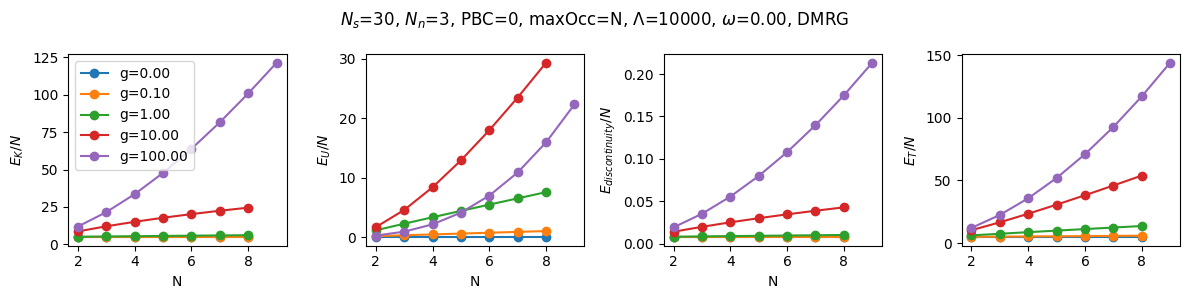

In [76]:
fig, ax = plt.subplots(1,4,figsize=[12,3])

for g in gs:
    ax[0].plot(range(2,maxN[g]), [EnergiesK[N,g]/N for N in range(2,maxN[g])] ,'-o',label='g='+g)
    ax[1].plot(range(2,maxN[g]), [EnergiesU[N,g]/N for N in range(2,maxN[g])] ,'-o',label='g='+g)
    ax[2].plot(range(2,maxN[g]), [EnergiesL[N,g]/N for N in range(2,maxN[g])] ,'-o',label='g='+g)
    ax[3].plot(range(2,maxN[g]), [EnergiesT[N,g]/N for N in range(2,maxN[g])] ,'-o',label='g='+g)
    
ax[0].set_xlabel('N')
ax[2].set_xlabel('N')
ax[1].set_xlabel('N')

ax[0].set_ylabel("$E_K/N$")
ax[1].set_ylabel("$E_U/N$")
ax[2].set_ylabel("$E_{discontinuity}/N$")
ax[3].set_ylabel("$E_T/N$")


#ax[3].plot([2,3,4,5,6],line)
ax[0].legend()

fig.suptitle('$N_s$=%i, $N_{n}$=%i, PBC=%i, maxOcc=N, $\Lambda$=%i, $\omega$=%.2f, %s'%(Ns,Nn,PBC,Λ,ω,source))

plt.tight_layout()
plt.savefig('./figures/Energies_vs_N_Ns%i_Nn%i_PBC%i_Lambda%.2f_omega%.2f_%s.pdf'%(Ns,Nn,PBC,Λ,ω,source), dpi=300 )
plt.show()
